In [18]:
#Imports
from scipy import io as sio
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Keras
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical

#Data import functions
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

#Utils for crossvalidation
from sklearn.model_selection import train_test_split

In [19]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [34]:
#Data import & preprocessing

#import
x_train, y_train = extract_training_samples('letters')   #determin dataset here
x_test, y_test = extract_test_samples('letters')

#when using letters dataset
y_train = y_train - 1
y_test = y_test -1
#

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
#reshape
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape
#converting the data from int8 to float32 and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.
#one-hot encoding for labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#splitting up data for crossvalidation
x_train, valid_X, train_label, valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.1)
x_train.shape, valid_X.shape, train_label.shape, valid_label.shape

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


((112320, 28, 28, 1), (12480, 28, 28, 1), (112320, 26), (12480, 26))

In [41]:
#Data import & preprocessing FOR COMBINED LETTERS AND MNIST

#import
x_train1, y_train1 = extract_training_samples('letters')   #determin dataset here
x_test1, y_test1 = extract_test_samples('letters')

#when using letters dataset
y_train1 = np.zeros(len(y_train1))
y_test1 = np.zeros(len(y_test1))
#
#import
x_train2, y_train2 = extract_training_samples('mnist')   #determin dataset here
x_test2, y_test2 = extract_test_samples('mnist')

y_train2 = np.zeros(len(y_train2)) +1
y_test2 = np.zeros(len(y_test2)) +1

x_train = np.concatenate((x_train1, x_train2))
x_test = np.concatenate((x_test1, x_test2))
y_train = np.concatenate((y_train1, y_train2))
y_test = np.concatenate((y_test1, y_test2))


import random 

a = list(zip(x_train, y_train))
b = list(zip(x_test, y_test))

random.shuffle(a)
random.shuffle(b)


classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
#reshape
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape
#converting the data from int8 to float32 and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.
#one-hot encoding for labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#splitting up data for crossvalidation
x_train, valid_X, train_label, valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.1)
x_train.shape, valid_X.shape, train_label.shape, valid_label.shape

Total number of outputs :  2
Output classes :  [0. 1.]


((166320, 28, 28, 1), (18480, 28, 28, 1), (166320, 2), (18480, 2))

In [42]:
#Params for training
batch_size = 64
epochs = 25
num_classes = 2

In [ ]:
#CNN no dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()
model_train = model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
#testing & analysis

#plots for acc and val_acc
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b+', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b+', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#evaluate testing data
test_eval = model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [31]:
#CNN with dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()
model_train_dropout = model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)         

In [44]:
#CNN with dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()
model_train_dropout = model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)         

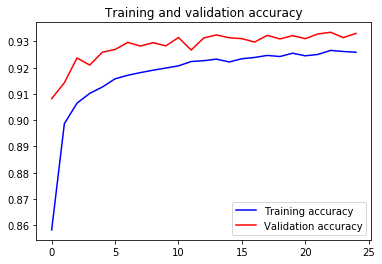

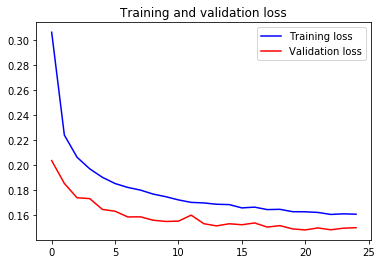

In [45]:
#testing & analysis

#plots for acc and val_acc
accuracy = model_train_dropout.history['accuracy']
val_accuracy = model_train_dropout.history['val_accuracy']
loss = model_train_dropout.history['loss']
val_loss = model_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
#evaluate testing data
test_eval = model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

30800/30800 [==============================] - 16s 520us/step
Test loss: 0.1494977895238341
Test accuracy: 0.9300649166107178


In [47]:
#save 
model.save("cnn_digit_letter_classif.model")

In [48]:
#load
classif = tf.keras.models.load_model("cnn_digit_letter_classif.model")
digit_classif = tf.keras.models.load_model("cnn_drop_mnist_25ep.model") 
letter_classif = tf.keras.models.load_model("cnn_drop_letters_25ep.model")

In [50]:
x_test, y_test = extract_test_samples('balanced')
x_test = x_test.reshape(-1, 28,28, 1)
x_test = x_test / 255.
y_test_one_hot = to_categorical(y_test)

In [52]:
f_pred = np.round(classif.predict(x_test))

In [57]:
f_pred[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)